In [22]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('max_rows',None)
pd.set_option('max_columns',None) 
pd.options.display.float_format = '{:,.0f}'.format

##  read and process the data

In [23]:
current_directory = Path.cwd()
folder_hotmusics = current_directory/'comments_files'
folder_hotmusics

WindowsPath('C:/Users/hp/1_python_1121/comments_files')

In [24]:
folder_popcomments = os.listdir(folder_hotmusics)

In [25]:
popmusics = []
for music in folder_popcomments:
    if music.endswith('.csv'):
        popmusics.append(music)
popmusics = pd.DataFrame(popmusics, columns=['popular_music'])
print(popmusics.shape)
popmusics.head()

(193, 1)


popular_music
0                        7 %.csv
1             All Falls Down.csv
2  Astronomia (Original Mix).csv
3                      But U.csv
4        Can We Kiss Forever.csv

In [26]:
popcomments = pd.DataFrame([])
for i in range(len(popmusics)):
    f = open(current_directory/'comments_files'/popmusics['popular_music'][i],encoding = 'utf-8')
    temp_df = pd.read_csv(f,usecols=[1,2,4])  
    temp_df['music_name'] = popmusics['popular_music'][i].split('.')[0]
    popcomments = pd.concat([popcomments,temp_df])


# # data processing
popcomments = popcomments.reset_index()
popcomments = popcomments.drop(['index'],axis=1)
popcomments.rename(columns={'1':'pop_comments'}, inplace = True)
popcomments.rename(columns={'0':'number_likes'}, inplace = True)
print(popcomments.shape)
#popcomments.head(30)

(2895, 4)


standardization of the num_likes column

In [7]:
likes = []
for i in range(len(popcomments)):
    popcomments['number_likes'][i] = str(popcomments['number_likes'][i])
    if(popcomments['number_likes'][i][-1:] == '‰∏á'):
        likes.append(str(int(float(popcomments['number_likes'][i].split('‰∏á')[0])*10000)))
    elif(popcomments['number_likes'][i][-2:-1] == '.'):
        likes.append(str(int(float(popcomments['number_likes'][i])*10000)))
    else:
        likes.append(str(popcomments['number_likes'][i]))
        
import math
reference = []
for i in range(len(popcomments)):
    reference.append(likes[(math.floor(i/15)+1)*15-1])
                      
likes = pd.DataFrame(likes,columns=['number_likes_amed'])  
reference = pd.DataFrame(reference,columns=['number_likes_refer'])  

likes = pd.concat([likes,reference],axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
popcomments = pd.concat([popcomments,likes],axis=1)
popcomments = popcomments.drop(['number_likes'],axis=1)
popcomments['number_likes_amed'] = popcomments['number_likes_amed'].astype(int)
popcomments['number_likes_refer'] = popcomments['number_likes_refer'].astype(int)
popcomments.head(30)

pop_comments  comments_num  \
0   1ÔºÖÁöÑÂåÖÂÆπ 1ÔºÖÁöÑÂÆ†Áà± 1ÔºÖÁöÑÈô™‰º¥ 1ÔºÖÁöÑË¥¥ÂøÉ 1ÔºÖÁöÑÊÉ≥Âøµ 1ÔºÖÁöÑÁêÜËß£ 1ÔºÖÁöÑÊáÇ‰Ω†\nÂâ©‰∏ã9...         88991   
1                         ÊàëÂ∞ÜÊòØ‰∏Ä‰∏™Â•ΩÂ•≥Â≠© Ê∞îË¥®Âá∫‰ºó ÊàêÁª©ÊãîÂ∞ñ Êú™Êù•‰∏ÄÁâáÂÖâÊòé\n         88991   
2                                  2020.2.14 ‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è\n         88991   
3                                  ‰∏äÂ∏ùÂàõÈÄ†‰∏ñÁïåÁî®‰∫Ü7Â§©ÔºåÁ¨¨7Êó•ÂÆâÊÅØ\n         88991   
4                                ËøôÊòØÂú®ËØ¥Êàë‰ª¨ÁöÑÊï∞Â≠¶‰Ωú‰∏öÂè™ÂÜô‰∫Ü7%ÂêóÔºü\n         88991   
5                                      ÊàëÂñúÊ¨¢ÁöÑ‰∫∫Êé®‰∫ÜËøôÈ¶ñÊ≠åÁªôÊàë\n         88991   
6                    "Êää‰∫ÆÂ∫¶Ë∞ÉÂà∞ÊúÄÂ∞èÔºåÊääÂ£∞Èü≥ÂºÄÊª°ÁöÑÂ•≥/Áî∑Â≠©Â≠ê‰∏ÄÂÆöÁà±ÊÉ®‰∫ÜÈÇ£‰∏™‰∫∫„ÄÇ"\n         88991   
7                                Â∞±ÁÆóËøòÊúâ7%ÁöÑÁîµÔºå‰πü‰∏çËÉΩÈòªÁ¢çÊàëÂéªÁà±‰Ω†\n         88991   
8                                  Ê≥°Ê≥°Êú∫Ëá™Â∑±‰π∞ÁöÑÔºåÂø´‰πê‰πüÊòØËá™Â∑±ÊâæÁöÑ\n         88991   
9         SOURCEMUSICÂíåWU‰ºöÂÜçÊé•ÂÜçÂéâÔºåÂà∂‰ΩúÊõ¥Â§öÁî®ÂøÉÁöÑ‰ΩúÂìÅÔºåÂõûÈ¶àÂ§ßÂÆ∂ÁöÑÊîØÊåÅ„ÄÇË∞¢Ë∞¢„ÄÇ\n         88991   
10                                       1„ÄÅ Èü≥‰πêÁî±‰∏É‰∏™Èü≥Èò∂ÊûÑÊàê         88991   
11  1ÔºÖÁöÑÂåÖÂÆπ 1ÔºÖÁöÑÂÆ†Áà± 1ÔºÖÁöÑÈô™‰º¥ 1ÔºÖÁöÑË¥¥ÂøÉ 1ÔºÖÁöÑÊÉ≥Âøµ 1ÔºÖÁöÑÁêÜËß£ 1ÔºÖÁöÑÊáÇ‰Ω†,Ââ©‰∏ã93...         88991   
12                                ‰∏ãÈù¢Êúâ‰∏™‰∫∫ËØ¥7%ÈÅáÂà∞‰Ω†93%Êù•Áà±‰Ω†\n         88991   
13  È¶ñÂÖàË∞¢Ë∞¢Â§ßÂÆ∂ÂØπÊ≠åÊõ≤ÁöÑÂñúÁà±ÂíåÂØπXMASwuÁöÑÊîØÊåÅÔºåÊàëÊòØÊ≠åÊõ≤BEATÁöÑ‰ΩúËÄÖÔºåÊ∫êÂäõÈü≥‰πêSOURCE...         88991   
14  AWMÊòØ‰∏ÄÊääÁãôÂáªÊû™ÔºåÂ®ÅÂäõÂæàÂº∫Âπ∂‰∏îÊØîËæÉÁ®ÄÂ∞ëÔºåÊÑèÊÄùÊòØ‚Äú‰Ω†ÊòØÊàëÁöÑÂèØÈÅá‰∏çÂèØÊ±Ç‚Äù‰∏ÄÈÉ®ËÄΩÁæéÂ∞èËØ¥ÁöÑÂêçÂ≠óÂ∞±ÊòØ...         88991   
15  Alan WalkerÊñ∞Ê≠åÊ∑±Â§ú‰∏äÁ∫øÔºÅÂè¶Â§ñAlan WalkerÂπ¥‰ªÖ20Â≤ÅÂ∞±ÂèñÂæó‰∫ÜÁôæÂ§ßDJ 1...        140165   
16  Alan Walkerüá≥üá¥Êê∫Êñ∞ÂçïAll Falls DownÂú®Mer MusikkÂèëË°å,È£éÊ†º...        140165   
17  Â§ßÂÆ∂ÊúüÂæÖÂ∑≤‰πÖÁöÑ„ÄäAll Falls Down„ÄãÁªà‰∫éÂèëË°åÔºÅËøôÊ¨°ÁöÑÂ•≥Â£∞vocalÊòØÁî±È∫¶Á≤íMile...        140165   
18                           ÂÜçÊúâ‰∫∫ËØ¥AWÊ±üÈÉéÊâçÂ∞ΩÔºåÊàëÂ∞±Áî®ËøôÈ¶ñÊ≠åÊäñÊñ≠‰ªñÁöÑËÖø\n        140165   
19                          Âê¨ÁùÄÊ≠å ÂêπÁùÄÈ£é ÊÉ≥ÁùÄ‰Ω† ÊàëÈÉΩ‰ºöÂæàÂ•Ω ÊàëÈÉΩÊó†ÊâÄË∞ì\n        140165   
20  Êó†ÁñëAlan WalkerÊòØÂåóÊ¨ßÁöÑÁîµÈü≥Â•áÊâçÔºåÊàëÊó†Ê≥ïÊÉ≥Ë±°‰ªñÂú®17Â≤ÅÂâçÁªèÂéÜ‰∫Ü‰ªÄ‰πàÊúâ‰∫ÜÂì™‰∫õÊÑüÊÇüÂºïÂèë...        140165   
21  ÁúãÂà∞Êé®ÈÄÅÂ∞±Ëµ∂Á¥ßÁÇπËøõÊù•‰∫ÜÔºÅÔºÅÔºÅÁÇπÁöÑÊâãÈÉΩÊòØÈ¢§ÊäñÁöÑÔºÅÔºÅÔºÅÊûúÁÑ∂‰∏çËÆ©ÊàëÂ§±ÊúõÊ≠§Êõ≤ËôΩÁÑ∂‰∏çÂ¶Ç‰πãÂâçÁöÑÂó®Ôºå‰ΩÜÊòØ‰∏ç...        140165   
22         ÊòéÊòéÂèØ‰ª•Èù†ËÑ∏ÂêÉÈ•≠ Âç¥ÂÅèË¶ÅÈù†Ëá™Â∑±ÁöÑÊâçÂçé ‰Ω†ÂèØÁü•ÈÅì‰Ω†ÊµëË∫´Êï£ÂèëÁùÄËÄÄÁúºÁöÑÂÖâËäí ‰∏çÂ®∂‰ΩïÊí©Âïä\n        140165   
23  Alan Walker ËøôÊ¨°ÂíåÂ•≥Ê≠åÊâãNoah CyrusÔºàMiley CyrusÁöÑÂ¶πÂ¶πÔºâÔºåÁî∑...        140165   
24                                     Èü≥Ê∫êÈóÆÈ¢òÂ∑≤‰øÆÂ§çÔºåÊÑüË∞¢ÂèçÈ¶à\n        140165   
25                 ÊàëÁî®Èü≥ÂìçÊîæ‰∫ÜËøôÈ¶ñÊ≠åÔºåÊ•º‰∏ãÂ±ÖÁÑ∂ÊääWIFIÂêçÊîπÊàê‚ÄúÊ•º‰∏äÊîæÁöÑ‰ªÄ‰πàÊ≠åÔºü‚Äù\n        140165   
26                                    ‰∏çÊòØÊ≤°‰Ω†‰∏çË°å Âè™ÊòØÊúâ‰Ω†Êõ¥Â•Ω\n        140165   
27   AWËøôÈ¶ñÊòØÁúüÁöÑÂ∏ÖÂïäÂïäÔºÅÔºÅÊ∑±Â§úË¢´ÂâçÂ•èÁîµÁöÑ‰∏çÊ≠¢Êàë‰∏Ä‰∏™ÂêßÔºÅÂ§™Ê∏ÖÊñ∞‰∫Ü~Â∏åÊúõAWÁôæÂ§ßËÉΩÂàõÈÄ†Êõ¥Â•ΩÁöÑÊàêÁª©ÔºÅ\n        140165   
28  Alan Walker ËÅîÊâãÂ•≥Ê≠åÊâãNoah CyrusÔºåÁî∑Ê≠åÊâãDigital Farm An...        140165   
29  AWÁöÑÊ≠åÂèØË∞ìÊòØ\n‚ÄúÂâçÂ•èË∑™ÔºåÂºÄÂè£ËÑÜÔºå\nÈ´òÊΩÆÈÉ®ÂàÜÂê¨Âà∞ÈÜâÔºåÁîµÈü≥Êù•‰∫ÜÊäñÊñ≠ËÖø„ÄÇ‚Äù AWÁöÑÊñ∞Âçï„ÄäAl...        140165   

        music_name  number_likes_amed  number_likes_refer  
0              7 %             160000                6715  
1              7 %             138000                6715  
2              7 %              61680                6715  
3              7 %              37306                6715  
4              7 %              35180                6715  
5              7 %              26098                6715  
6              7 %              16021                6715  
7              7 %   

## draw the frequency distribution histogram of comments' length

calculate the length of each comments

In [9]:
comments_len = []
for i in range(len(popcomments)):
    comments_len.append(len(popcomments['pop_comments'][i]))
comments_len = pd.DataFrame(comments_len,columns=['comments_len'])
popcomments = pd.concat([popcomments,comments_len],axis=1)
# print(popcomments.dtypes)
# popcomments.head(30)

draw a histogram for the distribution of comments' length 

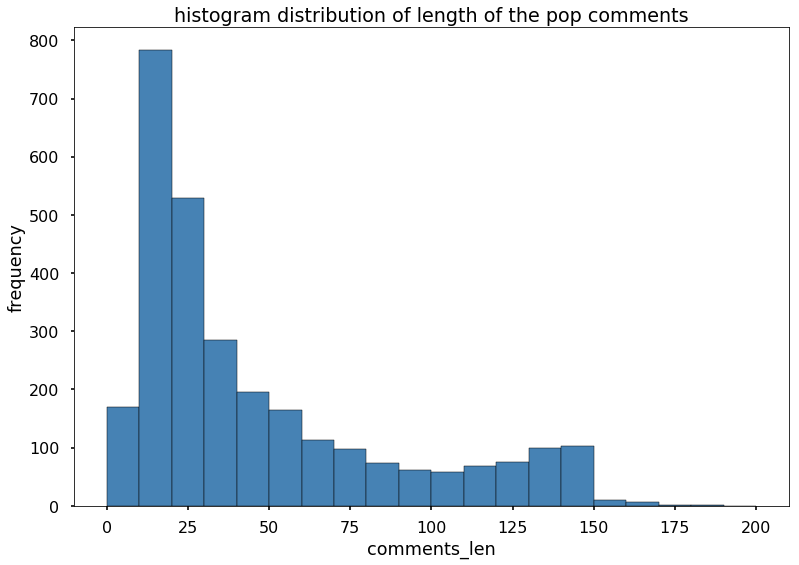

In [10]:
plt.style.use('seaborn-poster')
plt.hist(x = popcomments.comments_len, 
    bins = 20, 
    range = (0,200),
    color = 'steelblue', 
    edgecolor = 'black' 
     )
plt.xlabel('comments_len')
plt.ylabel('frequency')
plt.title('histogram distribution of length of the pop comments')
#plt.savefig('histogram distribution of length of the pop comments.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

the length of the comments concentrates at 10-40 and there is also a peak aroud 130-150 words  
**Possible InsightsÔºö** Producing longer comments can give full play of their incredible story-telling(or making?) talents

## select comments with length longer than 125 characters

In [11]:
long_comments = popcomments.loc[popcomments['comments_len']>125]
long_comments['music_name'].nunique()
long_comments.head(30)

pop_comments  comments_num  \
13   È¶ñÂÖàË∞¢Ë∞¢Â§ßÂÆ∂ÂØπÊ≠åÊõ≤ÁöÑÂñúÁà±ÂíåÂØπXMASwuÁöÑÊîØÊåÅÔºåÊàëÊòØÊ≠åÊõ≤BEATÁöÑ‰ΩúËÄÖÔºåÊ∫êÂäõÈü≥‰πêSOURCE...         88991   
16   Alan Walkerüá≥üá¥Êê∫Êñ∞ÂçïAll Falls DownÂú®Mer MusikkÂèëË°å,È£éÊ†º...        140165   
20   Êó†ÁñëAlan WalkerÊòØÂåóÊ¨ßÁöÑÁîµÈü≥Â•áÊâçÔºåÊàëÊó†Ê≥ïÊÉ≥Ë±°‰ªñÂú®17Â≤ÅÂâçÁªèÂéÜ‰∫Ü‰ªÄ‰πàÊúâ‰∫ÜÂì™‰∫õÊÑüÊÇüÂºïÂèë...        140165   
28   Alan Walker ËÅîÊâãÂ•≥Ê≠åÊâãNoah CyrusÔºåÁî∑Ê≠åÊâãDigital Farm An...        140165   
45   HeyÔºåÂçäÂπ¥Â•Ω‰πÖÔºå‰ΩÜÊ∑±ÂàªÁÉôÂú®ÊàëÂøÉÈáå„ÄÇÊàëÂ§úÊôöÁªèÂ∏∏Âú®ÂÆøËàçÈò≥Âè∞‰∏ÄÂèëÂëÜÂ∞±ÊòØÂá†‰∏™Â∞èÊó∂ÔºåÊÉ≥ÁùÄÈÇ£‰πàÂ§öÊõæÁªèËß¶...         48727   
57   ÂßêÂßêÔºåÂñúÊ¨¢‰πÉ‰∏áËøô‰ª∂‰∫ãÁúüÁöÑÂ•ΩÂπ∏Á¶èÔºåËøô‰ªΩÁà±‰ªéÊù•‰∏çÊòØÂçïÂêëÁöÑÔºåÂßêÂßêËØ¥‚ÄúÊØèÂΩì‰Ω†ËØ¥‰πÉ‰∏ái love yo...         48727   
76   ÂºÄÂßã‰º¥ÁùÄÂìºÂî±ÁöÑÊóãÂæãÔºåÂ∏¶ÁùÄ‰∏ÄÁßçÂê∏ÂºïÔºåËôΩÁÑ∂Ê≠åËØç‰∏≠Âî±ÁùÄYelling at the skyÔºà‰ª∞Â§©Èïø...         74019   
82   ÂÖ∂ÂÆûÊàëÂÅ∑ÂÅ∑Â≠ò‰∫Ü‰Ω†ÂèëÁöÑÊØè‰∏ÄÂº†ÁÖßÁâáÔºåÊØè‰∏Ä‰∏™ËßÜÈ¢ëÔºå‰øùÂ≠ò‰∫ÜÊØè‰∏ÄÂè•ËØ≠Èü≥„ÄÇÊàëÂÖ≥Ê≥®‰∫Ü‰Ω†ÁöÑÂêÑÁßçÁ§æ‰∫§ËΩØ‰ª∂IDÔºå...         74019   
89   ‰∫≤Áà±ÁöÑGodfrey\n‰Ω†ÊâÄÊúâÁöÑË°åÊùéÈÉΩÊî∂ÊãæÂ•Ω‰∫ÜÂêóÔºüÊòéÂ§©Â∞±Ë¶ÅËøúÊ∏∏‰∫ÜÔºåËøô‰∏ÄËµ∞Â∞±ÊòØ28Âπ¥ÔºåËµ∞ÁöÑÊó∂ÂÄô...         74019   
101  ÊòØ‰∏Ä‰∏™Áî∑Â≠©Â≠êÊúÄÁà±Âê¨ÁöÑÊ≠å ÈÇ£Â§©‰∏ãÂçàÔºåÁÉàÊó•ÁÇéÁÇéÔºåÊàë‰ª¨Âú®‰∫≤ÂêªÁº†ÁªµÂêéÔºå‰Ω†ÂùêÂú®Á™óÊà∑ËæπÈù†ÁùÄÊ§ÖÂ≠êÊîæÁùÄËøôÈ¶ñÊ≠å...         75774   
115  ÁæéÂõΩÂà∂‰Ωú‰∫∫ILLENIUMËøëÊó•ËÅîÊâãÂ•≥Â£∞NevveÂèëÂ∏ÉÂçïÊõ≤FracturesÔºå‰∏ÄÁõ¥‰ª•Êù•ÔºåIll...         67135   
125  hey kong ‰Ω†Áü•ÈÅìÂêó ‰Ω†ÁöÑÊúçË£ÖÂ∫óÊ≤°ÊúâÂè´purple rain ËÄåÊòØÂè´BANG ‰Ω†‰πüÊ≤°Êúâ...         50296   
130  üéÇËÅ™Âà´ÁîüÊó•Âø´‰πêÔºÅÂ∏åÊúõËøôÈ¶ñËÉΩÁ†¥‰∏á Êàë‰∏çÊÉ≥ËØª‰π¶‰∫ÜÔºåÂèØÊàëÂæóÁªôÁà∂ÊØç‰∏Ä‰∏™‰∫§‰ª£\nÊàë‰∏çÊÉ≥ËØª‰π¶‰∫ÜÔºåÂèØÊàë‰∏çÊÉ≥...         50296   
149  ÊàëÊó©‰∏ä6.30.‰∏äËØæÔºå9.20.‰∏ãÊôöËá™‰π†Ôºå‰∏≠ÂçàËøòÊòØ‰∏äËØæÔºåÊ≤°Êúâ‰ºëÊÅØÁöÑÊó∂Èó¥ÁöÑ...Êôö‰∏äÂõûÂÆ∂ÂÜôÂà∞1...        121029   
161  ‰∏âÊæÑÁöÑ‰∫∫Ê†ºÈ≠ÖÂäõÊÅ∞ÊÅ∞Âú®Â•πÁöÑÂü∫Ë∞ÉÊòØËã¶Ê∂©ÁöÑÔºå‰∏Ä‰∏™ÊáÇÂæóËßÑÂàôÁöÑ‰∫∫ÁöÑÂùöÊåÅÊòØÂ∞§‰∏∫ÂèØË¥µÁöÑ„ÄÇÂì™ÊÄïÂπ≥ÂíåÁöÑÊÄßÊ†º‰πü‰∏ç...        291457   
174  Âàù‰∏Ä‰∏äÂÜåÊó∂ËÆ∏Â§öÂ•≥ÁîüÈÉΩÂæàÂñúÊ¨¢ÊàëÔºåÁ™ÅÁÑ∂Êúâ‰∏ÄÂ§©‰∏Ä‰∏™Â•≥ÁîüÂêëÊàëË°®ÁôΩÔºåÂç¥Ë¢´ÊàëÂΩìÁùÄËÆ∏Â§ö‰∫∫ÁöÑÈù¢ÁªôÊãíÁªù‰∫ÜÔºå‰∏ãÂÜå...        158821   
242  ÂèôÁãôÂáªÊâã‰∏ÄÊääSVDÂÆàÂüéÔºåÊùÄÊïå220‰∫∫ÂêéÁâ∫Áâ≤„ÄÇKobaneÂüé‰øùÂç´ÊàòÔºåÂè™Ë∫´‰∏Ä‰∫∫Ôºå‰∏ÄÊääSVDÁãôÂáªÊû™...         54728   
246  ‰∏äÊµ∑ ‰∏Ä‰∏™‰∫∫ 16Â≤Å Ôºå‰∏≠ËÄÉÂ§±Âà©‰∏ä‰∫Ü‰∏≠‰∏ìÔºå ‰ΩÜÊòØÊàë‰∏çÊÉ≥ÂÜçËøô‰πàÂπ≥Â∫∏‰∏ãÂéªÔºå ÊàëË¶ÅÂéªÂÅöÊàëÊÉ≥ÂÅöÁöÑ‰∫ãÔºå...         54728   
252  Á¨¨‰∏ÄÊ¨°Âê¨ÊòØÂõ†‰∏∫‰∏Ä‰∏™ÂÖ¨ÁõäÂπøÂëä„ÄÇÊØè‰∏Ä‰ª∂Â∞è‰∫ãÈÉΩËï¥ËóèÁùÄÂ∑®Â§ßÁöÑËÉΩÈáèÔºåÊúâÊó∂ÂÄôÊàëËøûÂêëÈôåÁîü‰∫∫‰∏ªÂä®ÂæÆÁ¨ëÁöÑÂãáÊ∞îÈÉΩ...         54728   
266  ‰Ω†ÂØπSCP096ÁöÑÊâßÁùÄ‰∏ÄÊó†ÊâÄÁü•\n‰Ω†ÂØπSCP682ÁöÑÂº∫Â§ß‰∏ÄÊó†ÊâÄÁü•\n‰Ω†ÂØπSCP049ÁöÑ‰ø°Âøµ‰∏Ä...         17522   
286  Èó∫ËúúÈó¥ÁöÑÂÜçÂ∫¶Âêà‰Ωú!‰∏äÊ¨°Âêà‰ΩúËøòÊòØÂõõÂπ¥Â§öÂπ¥ÁöÑI Know What You Did Last S...         68137   
291  ‰∏§‰∏™‰∫∫ËÆ§ËØÜÂæà‰πÖÂæà‰πÖ‰∫ÜÔºÅÔºÅËêåÂæ∑Âú®ÈááËÆø‰∏≠‰∏çÊ≠¢‰∏ÄÊ¨°Ë°®Á§∫ËøáÂç°Â¶πÊòØ‰ªñÊúÄÂ•ΩÁöÑÊúãÂèã‰πã‰∏Ä Ê≤°Êúâ‰∫∫ËÉΩÊØîÂ•πÊõ¥ÊáÇËá™...         68137   
292  15Âπ¥Âêà‰ΩúI know what you did last summerÁöÑÊó∂ÂÄôÔºåËêåÂæ∑Ê≠£Â§Ñ‰∫é‰∫∫...         68137   
318  È´ò‰∫åÂÖöÔºåÊôÆÈÄöÁöÑÈ´ò‰∏≠ÔºåÂ≠¶‰π†ÊàêÁª©‰∏ÄËà¨ÔºåËÄÉ‰∏™ÊôÆÈÄöÁöÑ‰∫åÊú¨ÈÉΩÂøÖÈ°ª‰ªòÂá∫ÂæàÂ§ßÁöÑÂä™Âäõ„ÄÇ‰ªäÂ§©ÂÜôÁùÄÁâ©ÁêÜÈ¢òÔºåÁà∂‰∫≤‰ªñ...        373718   
321  ÊøÄÂä®‰∫∫ÂøÉÁöÑÊó∂ÂàªÂà∞Êù•Âï¶ÔºÅÁÉüÂç∑The Chainsmokers‰∏éÈÖ∑Áé©ColdplayÂº∫ÂäøÂêà‰ΩúÔºåÂøÖ...        373718   
324  ÊÉ≥ÂøÖÂ§ßÂÆ∂ÈÉΩÂ∑≤ÁªèÂê¨ËøáÁÉüÂç∑The ChainsmokersÂíåColdplayÂêà‰ΩúÁöÑÊñ∞Ê≠å‚ÄúSome...        373718   
330  Ëã¶Ëã¶Á≠âÁΩëÊòì‰∫ëÈü≥Ê∫êÁöÑËøô‰ºöÂÑøÂ∑≤Áªè‰∏äÊ≤πÁÆ°Ë∑üÂÅ∑Ë∂ÖÂ∏Ç‰∏ç‰ªòÈí±ÁöÑÊ¢®ÊüêÊüêÂú®ÂïÜÂú∫Ëπ¶Ë∑∂Â•ΩÂá†Âúà‰∫Ü ÂÖ®Á®ãÊãø‰∏™Ê§íÁõêÂç∑È•º...          8801   
332  Ê¢®ÂºèrapÊù•Âï¶ÔºÅÔºÅÔºÅ üçê Á¢ßÊ¢®Êñ∞Ê≠å„ÄäTherefore I Am„ÄãÔºàÊïÖÊàëÂú®ÔºâË∂ÖÁáÉÊù•Ë¢≠ÔºÅÊ≠åÂêçÂá∫...          8801   
334  I love this song so much, hope you enjoy it. A...          8801   
368  ‰ªñ‰ªéÊù•Â∞±‰∏çÊòØÂ§©ÈÄâ‰πãÂ≠ê Ê≤°ÊúâËøá‰∫∫ÁöÑÂ§©ÂàÜÂíåË©πÁöáÂ®ÅÂ∞ëÈÇ£Ê†∑ÂèòÊÄÅÁö

**Possible Insight**Ôºöhard to tell by the machine, but with more comments relating a story or making a confession

## regression between the thumbs up number and comments' length

In [12]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

standardization of the variable named num_likes_amed

In [13]:
popcomments_copy = popcomments
popcomments_copy['number_likes_amed'] = popcomments_copy['number_likes_amed'].astype(float)
popcomments_copy['number_likes_refer'] = popcomments_copy['number_likes_refer'].astype(float)
popcomments_copy['comments_num'] = popcomments_copy['comments_num'].astype(float)
popcomments_copy['number_likes_stand']= round(popcomments_copy['number_likes_amed']/popcomments_copy['number_likes_refer'],3)
# print(popcomments_copy.dtypes)
# popcomments_copy.head(15)

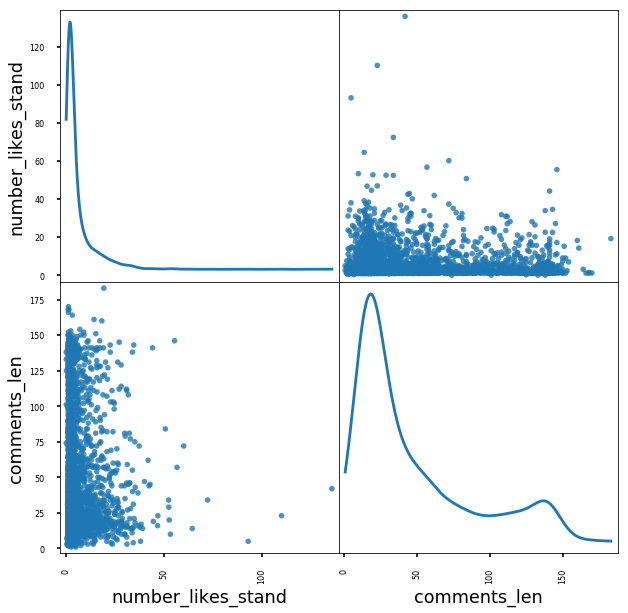

In [14]:
scatter_matrix(
    popcomments_copy[['number_likes_stand','comments_len']],
    alpha = 0.8,figsize =(10,10),diagonal = 'kde'
)
#plt.savefig('scatter_matrix.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

In [15]:
x = popcomments_copy['comments_len']
y = popcomments_copy['number_likes_stand']

In [16]:
reg = sm.OLS(y, x).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:     number_likes_stand   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     641.7
Date:                Sat, 21 Nov 2020   Prob (F-statistic):          4.83e-128
Time:                        18:22:38   Log-Likelihood:                -10562.
No. Observations:                2895   AIC:                         2.113e+04
Df Residuals:                    2894   BIC:                         2.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
comments_len     0.0716      0.003     25.332   

‰∏çËÉΩËØ¥ÂÆåÂÖ®‰∏ÄËá¥ Âè™ËÉΩËØ¥ÊòØÊØ´‰∏çÁõ∏ÂÖ≥:)

## draw the frequency distribution histogram of thumbs-up to comments ratio

calculate the commentsnumber_likesforhighestcomment ratio

In [17]:
ratio = []
for i in range(len(popcomments_copy)):
    ratio.append(popcomments_copy['number_likes_amed'][math.floor(i/15)*15]/popcomments_copy['comments_num'][i])
    
ratio = pd.DataFrame(ratio, columns=['ratio'])
popcomments_copy = pd.concat([popcomments_copy,ratio],axis=1)
popcomments_copy.head()

pop_comments  comments_num music_name  \
0  1ÔºÖÁöÑÂåÖÂÆπ 1ÔºÖÁöÑÂÆ†Áà± 1ÔºÖÁöÑÈô™‰º¥ 1ÔºÖÁöÑË¥¥ÂøÉ 1ÔºÖÁöÑÊÉ≥Âøµ 1ÔºÖÁöÑÁêÜËß£ 1ÔºÖÁöÑÊáÇ‰Ω†\nÂâ©‰∏ã9...        88,991        7 %   
1                        ÊàëÂ∞ÜÊòØ‰∏Ä‰∏™Â•ΩÂ•≥Â≠© Ê∞îË¥®Âá∫‰ºó ÊàêÁª©ÊãîÂ∞ñ Êú™Êù•‰∏ÄÁâáÂÖâÊòé\n        88,991        7 %   
2                                 2020.2.14 ‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è\n        88,991        7 %   
3                                 ‰∏äÂ∏ùÂàõÈÄ†‰∏ñÁïåÁî®‰∫Ü7Â§©ÔºåÁ¨¨7Êó•ÂÆâÊÅØ\n        88,991        7 %   
4                               ËøôÊòØÂú®ËØ¥Êàë‰ª¨ÁöÑÊï∞Â≠¶‰Ωú‰∏öÂè™ÂÜô‰∫Ü7%ÂêóÔºü\n        88,991        7 %   

   number_likes_amed  number_likes_refer  comments_len  number_likes_stand  \
0            160,000               6,715            54                  24   
1            138,000               6,715            26                  21   
2             61,680               6,715            17                   9   
3             37,306               6,715            17                   6   
4             35,180               6,715            19                   5   

   ratio  
0      2  
1      2  
2      2  
3      2  
4      2

In [18]:
ratio_music = pd.DataFrame(popcomments_copy['ratio'].unique(),columns=['ratio_music'])
name_music = pd.DataFrame(popcomments_copy['music_name'].unique(),columns=['name_music'])
comnum_likes_ratio = pd.concat([name_music,ratio_music],axis=1)
comnum_likes_ratio.head(15)

name_music  ratio_music
0                           7 %            2
1                All Falls Down            2
2     Astronomia (Original Mix)            1
3                         But U            2
4           Can We Kiss Forever            1
5       Dancing With Your Ghost            1
6                     DEAR JOHN            2
7                     Fractures            3
8                      Hey KONG            3
9   I don't wanna see u anymore            4
10                        Lemon            2
11           Love Is Gone (feat            1
12                   Love Story            2
13                     Lovefool            1
14                   MELANCHOLY            1

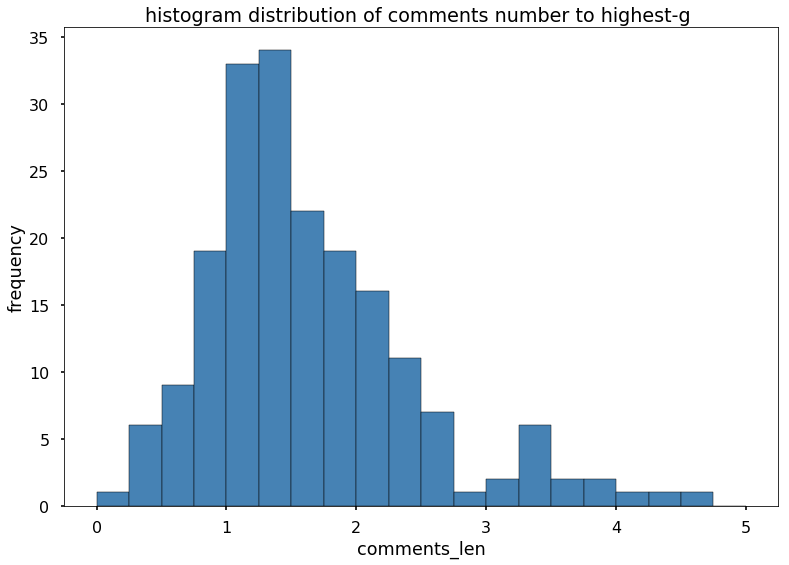

In [20]:
plt.hist(x = comnum_likes_ratio.ratio_music, 
    bins = 20, 
    range = (0,5),
    color = 'steelblue', 
    edgecolor = 'black' 
     )
plt.xlabel('comments_len')
plt.ylabel('frequency')
plt.title('histogram distribution of comments number to highest-g ')
#plt.savefig('histogram distribution of comments number to highest-g.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

select the musics with ratio mentioned above larger than 3

In [21]:
comnum_likes_ratio.loc[comnum_likes_ratio['ratio_music']>3]

name_music  ratio_music
9    I don't wanna see u anymore            4
70                         ÂêπÊ¢¶Âà∞Ë•øÊ¥≤            3
71                         ÂêπÁÅ≠Â∞èÂ±±Ê≤≥            5
75            ÂõçÔºàChinese WeddingÔºâ            3
79                           Â§ÑÂ§ÑÂêª            3
84                     Â§ßÂ§©Ëì¨ (Â•≥ÁîüÁâà)            4
86                            Â§ßÈ±º            4
100                         Âπ¥Â∞ëÊúâ‰∏∫            4
107                           ÊÇ¨Ê∫∫            4
119                         ÊàëÁöÑÂêçÂ≠ó            3
124                   ÊâßËø∑‰∏çÊÇü (DJÁâà)            3
132               ÊòØÊÉ≥‰Ω†ÁöÑÂ£∞Èü≥ÂïäÔºàDJÂÆåÊï¥ÁâàÔºâ            3
148                         Ê≤°ÊúâÁêÜÁî±            3
168                        Á∫¢Ëâ≤È´òË∑üÈûã            4
192                           È∫ªÈõÄ            3

the first 5 musics covers 4 of hot background music(bgm) from DOUYIN.   
**Possible insights**: Netease Cloud users are more willing to participate in community construction. People from DOUYIN(other application) won't bother to spend time on writing comments.